# Bayesian inference and computation

The mean-variance optimization mentioned in the previous section requires two statistical inputs: the vector of expected mean returns, and the covariance matrix of the assets being considered.

Statisticians assume the observed data for the returns comes from a data generating process (DGP), and both the mean vector and covariance matrix can be parameters of the DGP, for example, if we assume a multivariate normal distribution for the asset returns. Then, in order to estimate these parameters, we would need to make use of statistical inference.

There are two types of statistical inference, classical (or frequentist) and Bayesian.

## Classical statistics and maximum likelihood estimation

Classical statistics assumes parameter values as unobserved but fixed quantities, and the only thing keeping you from observing their true values is sample uncertainty.

Asset returns can be assumed to constitute a random sample of a multivariate normal distribution. In order to solve the mean-variance problem, we need to estimate the parameters of this multivariate normal: the mean vector, and the covariance matrix.

A quantity of interest known as the likelihood function quantifies sample uncertainty. It gives us the joint probability of the observed data as a function of different values for the model parameters.

One of the most common procedures in classical statistics is maximum likelihood estimation, which involves maximizing the likelihood function in order to find an estimate for the parameters. For the portfolio mean-variance problem, the maximum likelihood estimators for our parameters are the sample mean and sample covariance of the returns, which we introduced in the last section.

In order to show an example of frequentist inference, let's look at a Bernoulli random variable, with parameter $p$ and probability density function $P(X = x) = p^x (1-p)^{1-x}$

Let us then simulate data from a Bernoulli distribution with probability of success $p$ equal to 0.35 and a sample of size 10

In [1]:
import numpy as np

np.random.seed(1)
ber_sample = np.random.binomial(1, 0.35, size=10) # Bernoulli(p) can be denoted as Binomial(1, p)
ber_sample

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

The maximum likelihood estimator (MLE) for the rate of success $p$ is $\frac{\sum_{i=1}^n X_i}{N}$, where $X$ is our Bernoulli random variable, $X_i$ is each sample observation and $N$ is our sample size

The MLE of our parameter for the sample is:

In [2]:
np.sum(ber_sample)/len(ber_sample)

0.1

Let's increase our sample size to 100

In [3]:
ber_sample = np.random.binomial(1, 0.35, size=100)
ber_sample

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1])

In [4]:
np.sum(ber_sample)/len(ber_sample)

0.4

Now let's try 500

In [5]:
ber_sample = np.random.binomial(1, 0.35, size=500)
ber_sample

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,

In [6]:
np.sum(ber_sample)/len(ber_sample)

0.358

We can observe that, as our sample size grows, our MLE estimates come closer to the true value of the parameter. Results from probability theory such as the Law of Large Numbers and the Central Limit Theorem are of great relevance in classical statistics, as with a large enough sample our estimates converge to the true values.

## Bayesian inference: prior, likelihood and posterior

Bayesian inference treats parameters as random variables, just like the data.

It derives its name from Thomas Bayes, and has the Bayes rule as its cornerstone.

The Bayes rule is a theorem from probability theory arising from the definition of conditional probability.

Bayes rule: $P(A|B) = \frac{P(B|A)P(A)}{P(B)}$, where $A$ and $B$ are events.

Bayesian inference requires that the statistician assumes a prior probability distribution for the parameter of interest. The prior is then combined with the likelihood of the data, via Bayes rule, in order to obtain the posterior distribution of the parameters.

Bayesian inference, therefore, consists of obtaining a posterior distribution for the parameters, given the observed data and the prior distribution.

For a certain set of distributions, the posteriors can be obtained in closed form. These combinations of prior and likelihood distributions are known as conjugate priors.

When not using conjugate priors, we must resort to computational procedures such as Markov chain Monte Carlo (MCMC).

For Bernoulli/Binomial data the conjugate prior for the rate of success parameter is the Beta distribution, which has its range over the interval $[0,1]$. The Beta distribution has two hyperparameters, $a$ and $b$.

Let's see what the Beta distribution looks like

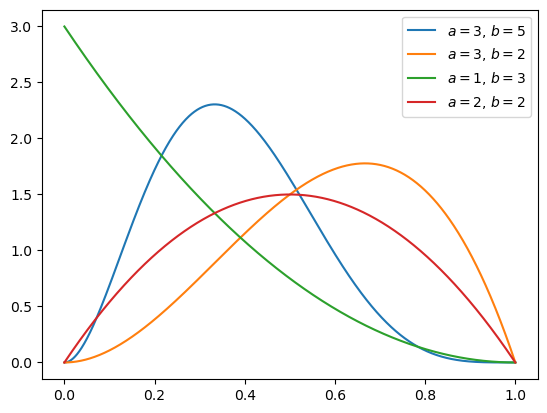

In [7]:
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0, 1, 1000)

a = 3
b = 5
plt.plot(x, st.beta.pdf(x, a, b), label = r"$a = 3$, $b = 5$")
a = 3
b = 2
plt.plot(x, st.beta.pdf(x, a, b), label = r"$a = 3$, $b = 2$")
a = 1
b = 3
plt.plot(x, st.beta.pdf(x, a, b), label = r"$a = 1$, $b = 3$")
a = 2
b = 2
plt.plot(x, st.beta.pdf(x, a, b), label = r"$a = 2$, $b = 2$")
plt.legend()

It is worth mentioning that the uniform distribution over $[0,1]$ is a special case of the Beta distribution, when both $a$ and $b$ are equal to 1.

We can summarize our prior uncertainty regarding the value of the Bernoulli rate of success $\theta$ through the Beta distribution, choosing it as our prior distribution for $\theta$.

We can rewrite the Bayes rule as

$P(\theta|X = x) \propto P(\theta)P(X = x|\theta)$,

where $P(\theta)$ is our prior uncertainty about the value of $\theta$, and in this case corresponds to the Beta distribution.

$P(X = x|\theta)$ is our likelihood, that is, the probability of observing the data $X$ as a function of $\theta$. This corresponds to our observed Bernoulli random variables.

$P(\theta|X = x)$ is our posterior distribution for $\theta$, and shall also have a Beta distribution. 

The kernel for our prior distribution with parameters $a$ and $b$ is $\theta^{a-1}(1-\theta)^{b-1}$.

The kernel for the Bernoulli likelihood for data $x$ is $\theta^x (1-\theta)^{1-x}$.

If we observe $n$ Bernoulli RV's we shall have $\theta^{\sum x} (1-\theta)^{n - \sum x}$.

Combining both kernels via Bayes rule

$P(\theta|X = x) \propto P(\theta)P(X = x|\theta) = \theta^{a-1}(1-\theta)^{b-1}\theta^{\sum x} (1-\theta)^{n-\sum x} = \theta^{a+ \sum x-1}(1-\theta)^{b + n - \sum x - 1}$.

It is easy to see that $P(\theta|X = x)$ is proportional to the kernel of a Beta distribution with parameters $a^* = a + \sum x$ and $b^* = b + n - \sum x$.

For example, if we once again simulate data from a Bernoulli distribution with $\theta = 0.35$:

In [8]:
ber_sample = np.random.binomial(1, 0.35, size=10)
ber_sample

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0])

If we set the prior for $\theta$ as a Beta distribution with parameters $a = 2$ and $b = 4$, then our posterior shall be a Beta with $a^* = 2 + 2 = 4$ and $b^* = 4 + 10 - 2 = 12$.

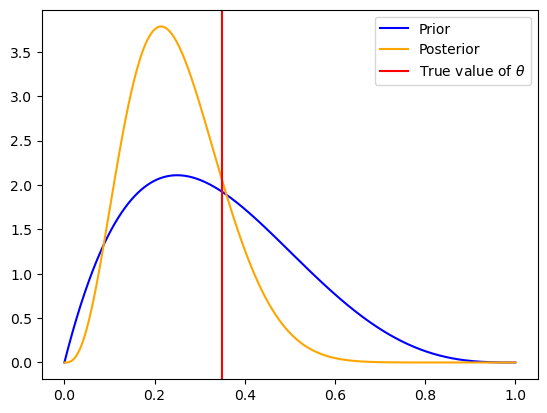

In [9]:
a = 2
b = 4
plt.plot(x, st.beta.pdf(x, a, b), color="b", label = "Prior")
a = 4
b = 12
plt.plot(x, st.beta.pdf(x, a, b), color="orange", label = "Posterior")
plt.axvline(0.35, color="r", label = r"True value of $\theta$")
plt.legend()

Now let's try a sample of size 100 with the same prior:

In [10]:
ber_sample = np.random.binomial(1, 0.35, size=100)
ber_sample

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

In [11]:
np.sum(ber_sample)

35

$a^* = 2 + 30 = 32$, $b^* = 4 + 100 - 30 = 74$

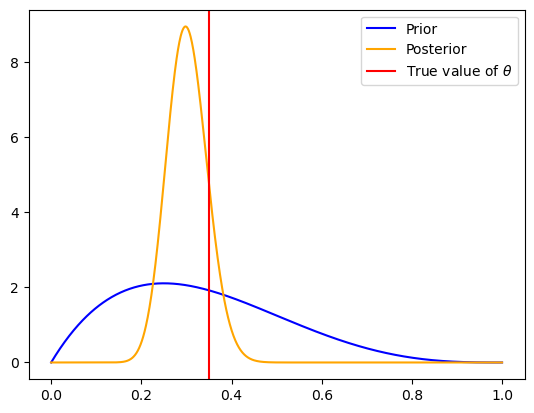

In [12]:
a = 2
b = 4
plt.plot(x, st.beta.pdf(x, a, b), color="b", label = "Prior")
a = 32
b = 74
plt.plot(x, st.beta.pdf(x, a, b), color="orange", label = "Posterior")
plt.axvline(0.35, color="r", label = r"True value of $\theta$")
plt.legend()

Now with a sample of size 1000:

In [13]:
ber_sample = np.random.binomial(1, 0.35, size=1000)
np.sum(ber_sample)

354

$a^* = 2 + 340 = 342$, $b^* = 4 + 1000 - 340 = 664$

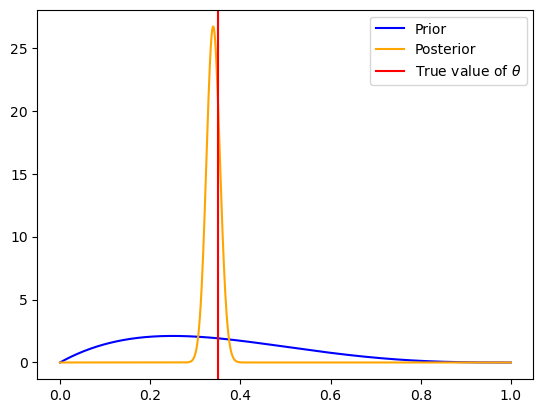

In [14]:
a = 2
b = 4
plt.plot(x, st.beta.pdf(x, a, b), color="b", label = "Prior")
a = 342
b = 664
plt.plot(x, st.beta.pdf(x, a, b), color="orange", label = "Posterior")
plt.axvline(0.35, color="r", label = r"True value of $\theta$")
plt.legend()

## Inference for the mean vector of stock returns

In finance it is common to assume that that asset returns are normally distributed.

In Bayesian inference, for normally distributed data, a Normal prior for the mean (and also for the variance) is conjugate, resulting in a closed form Normal posterior.

For the Normal prior with hyperparameters $\mu_0$ and $\sigma^2_0$, and likelihood for the data $x_i$, $i=1,\ldots,n$ with known sample variance $\sigma^2$ we shall have the posterior variance

$\sigma^2_{pos} = \bigg( \frac{1}{\sigma^2_0} + \frac{n}{\sigma^2} \bigg)^{-1}$,

and posterior mean

$\mu_{pos} = \sigma^2_{pos} \bigg( \frac{\mu_0}{\sigma^2_0} + \frac{\sum_{i=1}^n x_i}{\sigma^2} \bigg)$.

Now let's try outthis very simple Bayesian model for estimating mean stock returns:

In [15]:
import pandas as pd
import yfinance as yf

aapl = yf.Ticker("AAPL").history(period="max")

In [16]:
aapl_2019 = aapl['2019-03-01':'2019-06-30']['Close'].pct_change().dropna()
len(aapl_2019)

83

C:\Users\USUARIO\anaconda3\envs\pymc_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


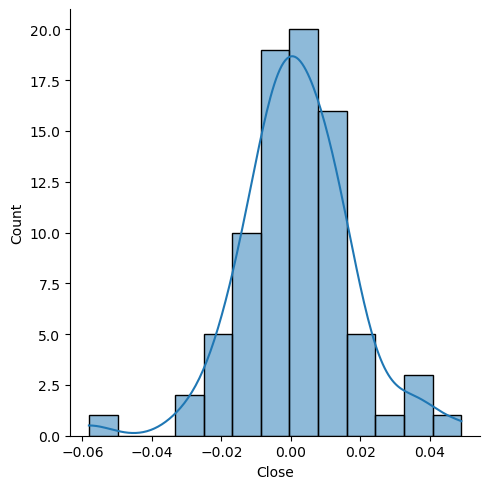

In [17]:
import seaborn as sns

sns.displot(aapl_2019, kind='hist', kde=True)

In [18]:
np.mean(aapl_2019)

0.0016555613435853558

In [19]:
np.var(aapl_2019) ## sample variance

0.00024617563542999894

We can start by proposing a prior distribution for the returns, with mean $\mu_0 = 0.004$ and $\sigma^2_0 = 0.0004$.

C:\Users\USUARIO\anaconda3\envs\pymc_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


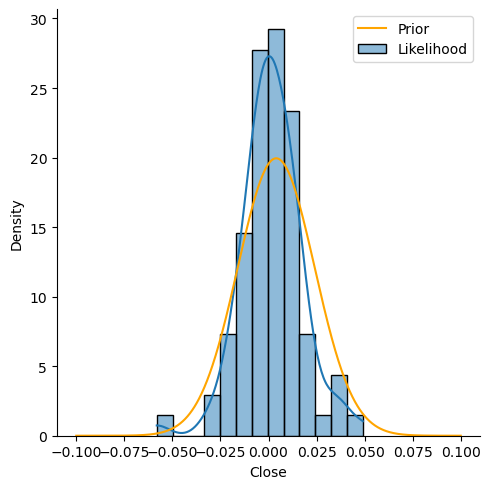

In [20]:
sns.displot(aapl_2019, stat='density', kde=True, label='Likelihood')
x = np.linspace(-0.1, 0.1, 1000)
plt.plot(x, st.norm.pdf(x, loc = 0.004, scale = np.sqrt(0.0004)), color="orange", label = "Prior") ## loc is the mean and scale is the standard deviation
plt.legend()

Our sample variance equals approximately 0.00025, and our sample size is 60. So we have

$\sigma^2_{pos} = \bigg( \frac{1}{0.0004} + \frac{250}{0.00025} \bigg)^{-1} \approx 0.000003$,

$\mu_{pos} = 0.000003 \bigg( \frac{0.004}{0.0004} + \frac{0.137}{0.00025} \bigg) \approx = 0.001674$,

The estimated posterior mean of 0.001674 does come very close to the sample mean of 0.001655.

C:\Users\USUARIO\anaconda3\envs\pymc_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


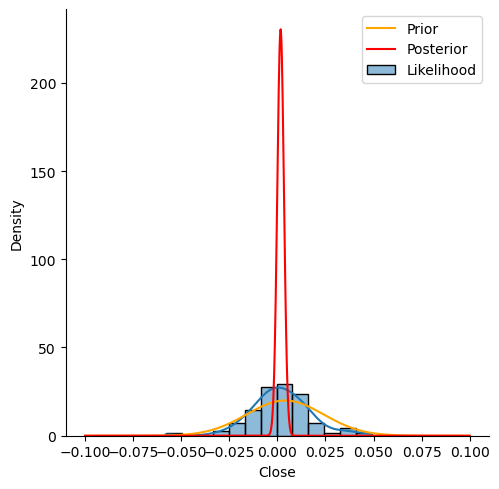

In [21]:
sns.displot(aapl_2019, stat='density', kde=True, label='Likelihood')
x = np.linspace(-0.1, 0.1, 1000)
plt.plot(x, st.norm.pdf(x, loc = 0.004, scale = np.sqrt(0.0004)), color="orange", label = "Prior")
plt.plot(x, st.norm.pdf(x, loc = 0.001674, scale = np.sqrt(0.000003)), color="r", label = "Posterior")
plt.legend()

## Bayesian computation

In case we choose not to use conjugate prior distributions, the inference must be done via numerical methods, and one of the Python libraries for this is PyMC.

It has been proposed that the distribution of returns might present fatter tails, that is, more extreme values, than the normal distribution allows for. The Student's t distribution allows for fatter tails. 

The t distribution has an additional parameter, besides mean and variance, called degrees of freedom. It controls how fat the tails are. As the degrees of freedom parameter converges to infinity, the t distribution approaches a normal distribution.

Let's see what t distributions with zero mean and unit variance look like:

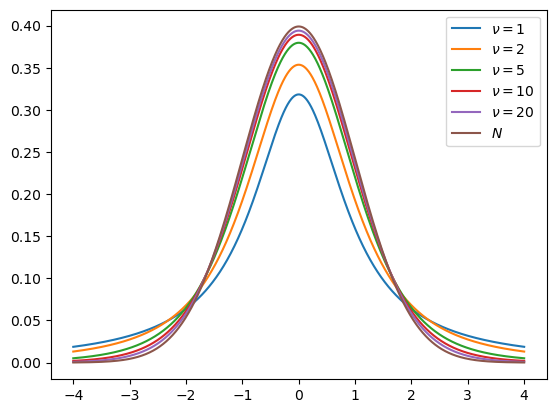

In [22]:
x = np.linspace(-4, 4, 1000)

df_list = [1, 2, 5, 10, 20]
for i in df_list:
    plt.plot(x, st.t.pdf(x, i, loc = 0, scale = 1), label = r"$\nu = $" + str(i))
plt.plot(x, st.norm.pdf(x, loc = 0, scale = 1), label = r"$N$")
plt.legend()

Now let's estimate both the normal and t distribution models for asset returns in PyMC:

In [23]:
import pymc as pm
import arviz as az

with pm.Model() as model_normal:
    mu = pm.Normal('mu', mu = 0.004, sigma = np.sqrt(0.0004))
    likelihood = pm.Normal('y', mu = mu, sigma = np.sqrt(0.00025), observed=aapl_2019)
    normal_trace = pm.sample(2000, tune=1000, target_accept=0.8, init='adapt_diag')

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Auto-assigning NUTS sampler...


Initializing NUTS using adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [mu]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 32 seconds.


In [24]:
az.summary(normal_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,0.002,0.002,-0.001,0.005,0.0,0.0,3418.0,5657.0,1.0


array([[<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'mu'}>]],
      dtype=object)

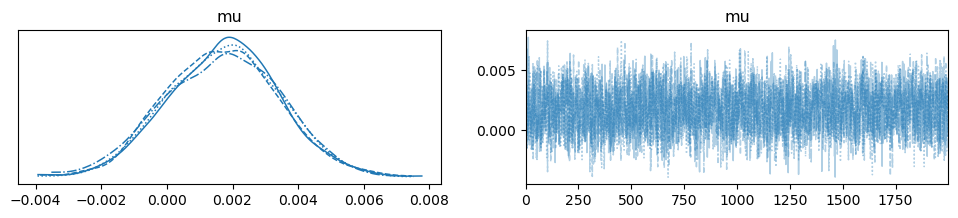

In [25]:
az.plot_trace(normal_trace)

In [26]:
with pm.Model() as model_t:
    df = pm.Gamma('df', alpha = 2, beta = 10)
    mu = pm.Normal('mu', mu = 0.004, sigma = np.sqrt(0.0004))
    likelihood = pm.StudentT('y', mu = mu, sigma = np.sqrt(0.00025), nu = df, observed=aapl_2019)
    t_trace = pm.sample(2000, tune=1000, target_accept=0.8, init='adapt_diag')

Auto-assigning NUTS sampler...


Initializing NUTS using adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [df, mu]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 35 seconds.


In [27]:
az.summary(t_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,0.001,0.002,-0.002,0.005,0.000,0.000,8398.0,6274.0,1.0
df,1.618,0.298,1.087,2.171,0.003,0.002,8240.0,5517.0,1.0


array([[<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'mu'}>],
       [<Axes: title={'center': 'df'}>, <Axes: title={'center': 'df'}>]],
      dtype=object)

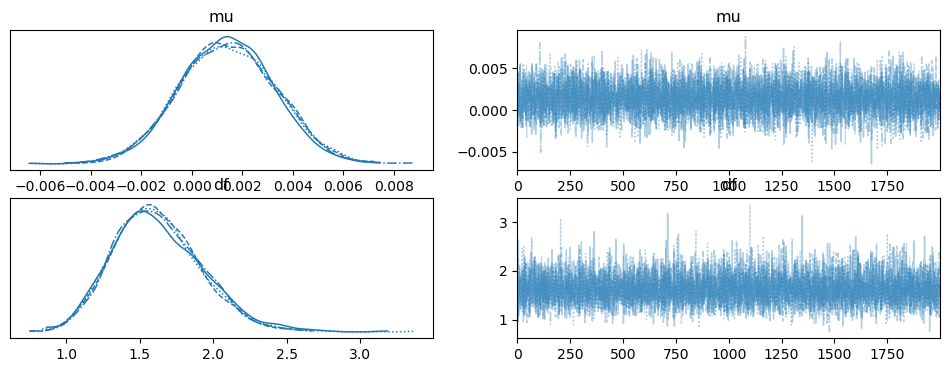

In [28]:
az.plot_trace(t_trace)

## Additional references for this section

Schervish, M. J., DeGroot, M. H. (2013). Probability and Statistics. The whole book is a great introductory course for both probability theory and (both classical and Bayesian) inference. In particular, Chapter 3 is an introduction to random variables and probability distributions, and Chapter 7 focuses on both Bayesian and maximum likelihood estimation.

McElreath, R. (2020). Statistical Rethinking: A Bayesian Course with Examples in R and Stan. Chapter 1 explains how we should intepret statistical models in the context of applied scientific research, and Chapters 2 and 3 provide the conceptual foundations of practical Bayesian modeling, such as probability, information and sampling theory. Python ports of this book can be found at https://github.com/pymc-devs/pymc-resources/tree/main/Rethinking_2.

Introductory Overview of PyMC by the PyMC team: https://www.pymc.io/projects/docs/en/latest/learn/core_notebooks/pymc_overview.html. A great introduction to the PyMC package aimed at those with little to no experience in Bayesian statistics.